# Exponential Smoothing on Finance Dataset

In [20]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

df = pd.read_csv("stocks.csv")
print(df)

              date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]


In [21]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [22]:
df.dropna(inplace=True)

missing_values_after_drop = df.isnull().sum()
print("Missing values in each column after dropping rows:")
print(missing_values_after_drop)

Missing values in each column after dropping rows:
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [23]:
df['date'] = pd.to_datetime(df['date'])

def apply_holt_winters(stock_name, seasonal_periods):
    stock_data = df[df['Name'] == stock_name]
    stock_data.set_index('date', inplace=True)

    model_hw = ExponentialSmoothing(
        stock_data['close'],
        trend='add',
        seasonal='add',
        seasonal_periods=seasonal_periods
    )
    fitted_hw = model_hw.fit()

    smoothed_hw_values = fitted_hw.fittedvalues

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['close'], label='Original Data')
    plt.plot(smoothed_hw_values, label=f'Smoothed Data (Holt-Winters, {stock_name})')
    plt.title(f'Triple Exponential Smoothing for {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    print(fitted_hw.summary())

C:\Users\Esha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


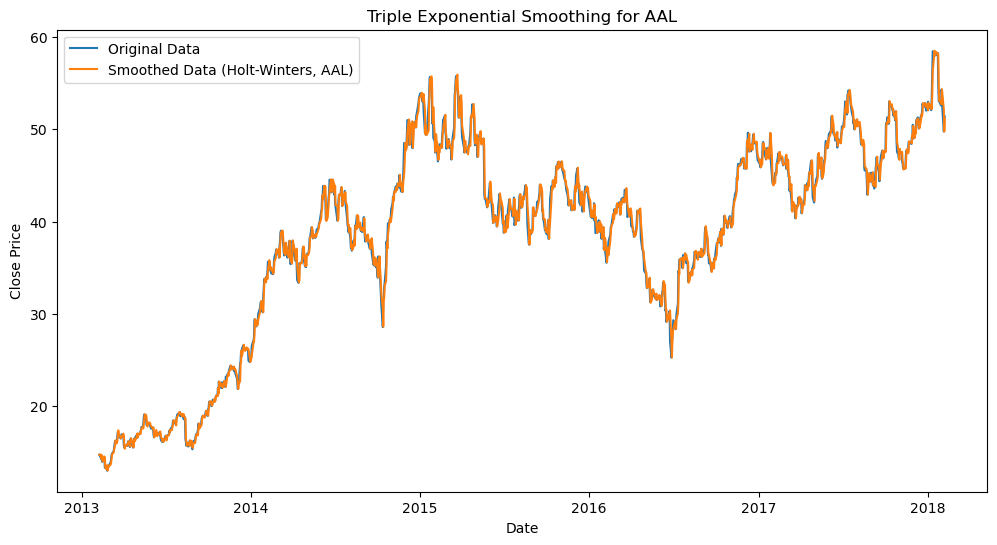

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    close   No. Observations:                 1259
Model:             ExponentialSmoothing   SSE                            935.885
Optimized:                         True   AIC                           -351.395
Trend:                         Additive   BIC                           -294.876
Seasonal:                      Additive   AICC                          -351.103
Seasonal Periods:                     7   Date:                 Mon, 13 May 2024
Box-Cox:                          False   Time:                         23:50:48
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

In [24]:
#example
apply_holt_winters('AAL', seasonal_periods=7)

In [27]:
import pickle
with open('est_finance.pkl', 'wb') as f:
    pickle.dump(apply_holt_winters, f)